# HIV Model

    Kyle McCracken 10/15/2018
   

In [8]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [17]:
HIVsystem = System(gamma=1.36, 
                   tao=0.2, 
                   mu=0.00136, 
                   beta=0.00027, 
                   alpha=0.036, 
                   rho=0.1, 
                   pi=100, 
                   delta=0.33, 
                   sigma=2, 
                   t0=0, 
                   t_end=120,
                   dt=0.1)

,values
gamma,1.36000
tao,0.20000
mu,0.00136
beta,0.00027
alpha,0.03600
rho,0.10000
pi,100.00000
delta,0.33000
sigma,2.00000
t0,0.00000


In [18]:
HIVstate = State(R=200, L=0, E=0, V=100, CD4=1000)

,values
R,200
L,0
E,0
V,100
CD4,1000


In [19]:
def update_func(state,t,system):
    unpack(system)
    r, l, e, v, cd4 = state
    
    dr = gamma*tao - mu*r - beta*r*v
    dl = rho*beta*r*v - mu*l - alpha*l
    de = (1 - rho)*beta*r*v + alpha*l - delta*e
    dv = pi*e - sigma*v
    
    r += dr * dt
    l += dl * dt
    e += de * dt
    v += dv * dt
    cd4 = 1000*(1-tao) + r + l + e
    
    return State(R=r, L=l, E=e, V=v, CD4=cd4)

In [20]:
update_func(HIVstate,1,HIVsystem)

,values
R,199.460
L,0.054
E,0.486
V,80.000
CD4,1000.000


In [21]:
def run_simulation(system, update_func, state):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0,t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    return frame

In [22]:
frameData = run_simulation(HIVsystem, update_func, HIVstate)
frameData.head()

,R,L,E,V,CD4
0.0,200,0,0,100,1000
0.1,199.46,0.054,0.486,80,1000
0.2,199.029,0.0968816,0.857907,68.86,999.984
0.3,198.659,0.133524,1.16298,63.6671,999.956
0.4,198.318,0.167174,1.43243,62.5635,999.918


Text(0,0.5,'L (g), E (b)')

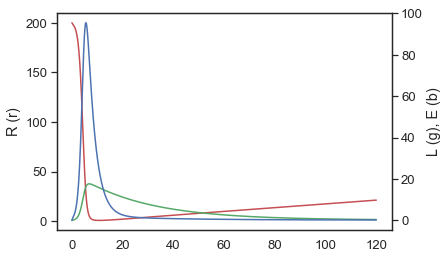

In [23]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(frameData.R,'r')
ax1.set_ylabel('R (r)')

ax2 = ax1.twinx()
ax2.set_yscale('linear')
ax2.plot(frameData.L,'g')
ax2.plot(frameData.E,'b')
ax2.set_ylabel('L (g), E (b)')

Text(0,0.5,'V (r)')

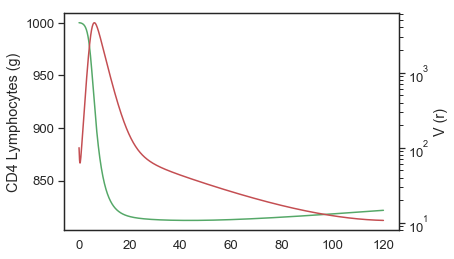

In [24]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.plot(frameData.CD4,'g')
ax1.set_ylabel('CD4 Lymphocytes (g)')

ax2 = ax1.twinx()
ax2.set_yscale('log')
ax2.plot(frameData.V,'r')
ax2.set_ylabel('V (r)')